# Import required libraries

In [1]:
# For loading Packages
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', 100)

# For mathematical calculations
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# To build and evaluate model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from tabulate import tabulate

# To ignore any warnings
import warnings
warnings.filterwarnings("ignore")

# Data


**Raeding data**

In [2]:
# Read train data
train_df = pd.read_csv("../input/spaceship-titanic/train.csv")
# Read test data
test_df = pd.read_csv("../input/spaceship-titanic/test.csv")

# Exploratory Data Analysis (EDA)

In [3]:
# print datatypes of the train data
train_df.dtypes

test_df.dtypes

print(train_df.dtypes)
print('')
print(test_df.dtypes )

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [4]:
# Print shape of train data
print("The shape of the train dataset is: ", train_df.shape)

# Print shape of test data
print("The shape of the test dataset is: ", test_df.shape)

# Train data set preview 
train_df.head()

The shape of the train dataset is:  (8693, 14)
The shape of the test dataset is:  (4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Missing Values**

In [5]:
print('TRAIN SET MISSING VALUES:')
print(train_df.isna().sum())
print('')
print('TEST SET MISSING VALUES:')
print(test_df.isna().sum())

TRAIN SET MISSING VALUES:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

TEST SET MISSING VALUES:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


**Univariate Analysis**

*ทำการตรวจสอบข้อมูลแต่ละ Feature เพื่อทำความเข้าใจการกระจายของค่าต่าง ๆ*


* **Independent Variable**

*HomePlanet, CryoSleep, Destination, VIP*

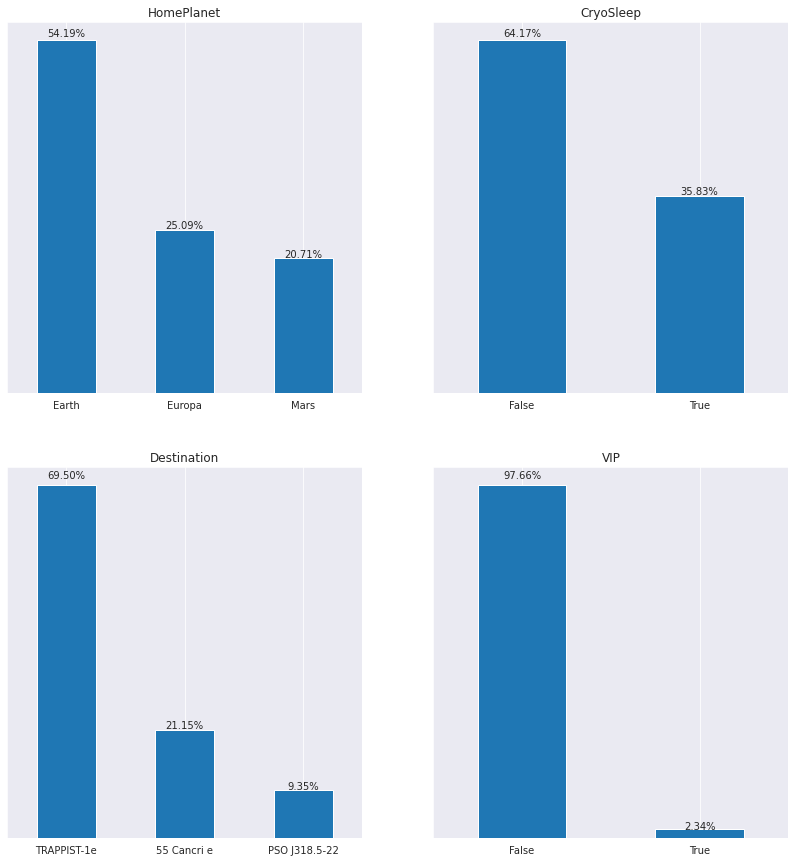

In [6]:
# Visualize independent categorical features
plt.figure(figsize = (14, 15)) 

# Bar plot
plt.subplot(221).axes.get_yaxis().set_ticks([])
# train_df['HomePlanet'].value_counts(normalize = True).plot.bar(title = 'HomePlanet')
ax = train_df['HomePlanet'].value_counts(normalize = True).plot.bar(title = 'HomePlanet', rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.02%}', (x + width/2, y + height*1.01), ha='center')

plt.subplot(222).axes.get_yaxis().set_ticks([])
# train_df['CryoSleep'].value_counts(normalize = True).plot.bar(title = 'CryoSleep')
ax = train_df['CryoSleep'].value_counts(normalize = True).plot.bar(title = 'CryoSleep', rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.02%}', (x + width/2, y + height*1.01), ha='center')

plt.subplot(223).axes.get_yaxis().set_ticks([])
# train_df['Destination'].value_counts(normalize = True).plot.bar(title = 'Destination')
ax = train_df['Destination'].value_counts(normalize = True).plot.bar(title = 'Destination', rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.02%}', (x + width/2, y + height*1.02), ha='center')

plt.subplot(224).axes.get_yaxis().set_ticks([])
# train_df['VIP'].value_counts(normalize = True).plot.bar(title = 'VIP')
ax = train_df['VIP'].value_counts(normalize = True).plot.bar(title = 'VIP', rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.02%}', (x + width/2, y + height*1.02), ha='center')

>จากกราฟจะเห็นได้ว่า
> * HomePlanet - ผู้โดยสารจะมาจาก Earth มากที่สุด ประมาณ 54.19% ของผู้โดยสารทั้งหมด, ผู้โดยสารจะมาจาก Europa เป็นอันดับสอง ประมาณ 25.09% ของผู้โดยสารทั้งหมดและผู้โดยสารจะมาจาก Mars น้อยที่สุด ประมาณ 20.71% ของผู้โดยสารทั้งหมด
> * CryoSleep - ผู้โดยสารที่ใช้งาน CryoSleep มีประมาณ 64.17% ของผู้โดยสารทั้งหมด และผู้โดยสารที่ไม่ได้ใช้งาน CryoSleep มีประมาณ 35.83% ของผู้โดยสารทั้งหมด
> * Destination - ผู้โดยสารส่วนใหญ่มีจุดหมายปลายทางอยู่ที่ TRAPPIST-1e ประมาณ 60.50% ของผู้โดยสารทั้งหมด, ผู้โดยสารที่มีจุดหมายปลายทางอยู่ที่ 55 Cancri e ประมาณ 21.15% ของผู้โดยสารทั้งหมด และผู้โดยสารที่มีจุดหมายปลายทางอยู่ที่ PSO J318.5-22 ประมาณ 9.35% ของผู้โดยสารทั้งหมด
> * VIP - ผู้โดยสารส่วนใหญ่ที่ไม่ได้เป็น VIP ประมาณ 97.66% ของผู้โดยสารทั้งหมด และผู้โดยสารที่เป็น VIP มีเพียง 2.34% ของผู้โดยสารทั้งหมด


*Cabin*

ทำการแบ่ง column Cabin เป็น CabinDeck, CabinNo และ CabinSide เพื่อสำรวจที่นั่งของผู้โดยสาร

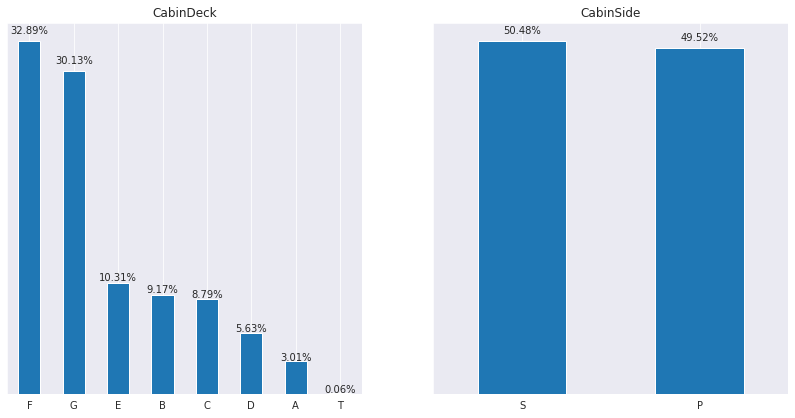

In [7]:
# Extract CabinDeck, CabinNo. and CabinSide feature from Cabin
train_df1 = train_df.copy()
train_df1[["CabinDeck", "CabinNo.", "CabinSide"]] = train_df1["Cabin"].str.split('/', expand = True)

# Visualize cabin feature
plt.figure(figsize = (14, 15)) 
plt.subplot(221).axes.get_yaxis().set_ticks([])
ax = train_df1['CabinDeck'].value_counts(normalize = True).plot.bar(title = 'CabinDeck', rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.02%}', (x + width/2, y + height*1.02), ha='center')

plt.subplot(222).axes.get_yaxis().set_ticks([])
ax = train_df1['CabinSide'].value_counts(normalize = True).plot.bar(title = 'CabinSide', rot=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.02%}', (x + width/2, y + height*1.02), ha='center')

> จากกราฟจะเห็นว่า
>    * CabinDeck - ผู้โดยสารประมาณ 60% ส่วนใหญ่จะอยู่ที่ชั้น F และ G โดยคิดเป็น 32.89% และ 30.13% ตามลำดับ
>    * CabinSide - ผู้โดยสารที่นั่งฝั่ง Starboard และ Port มีสัดส่วนไม่แตกต่างกันมากนัก โดยคิดเป็น 50.48% และ 49.52% ตามลำดับ


*Age*

ดูการกระจายตัวของ Age 

Text(0.5, 1.0, 'Age distribution')

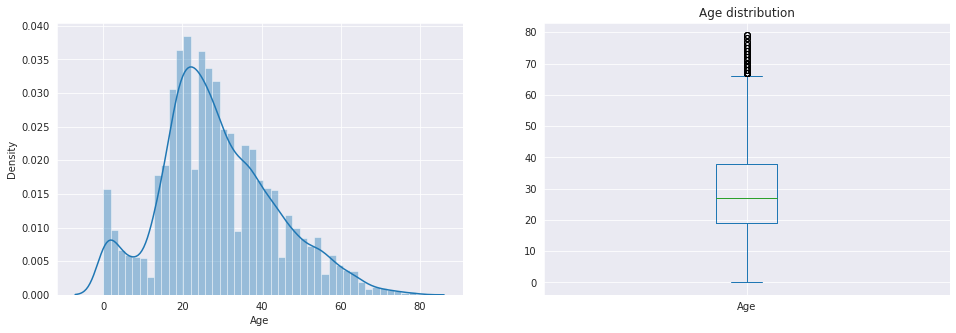

In [8]:
# Visualize Age variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Age']);
#Box plot
plt.subplot(122)
train_df['Age'].plot.box(figsize = (16, 5));
plt.title('Age distribution')


>     จากกราฟจะเห็นว่ามี Outliers อยู่ใน Feature นี้ และจาก Box plot จะเห็นว่า Median    (ค่ามัธยฐาน) จะอยู่ในช่วง 20 - 30 ปี


*RoomService*

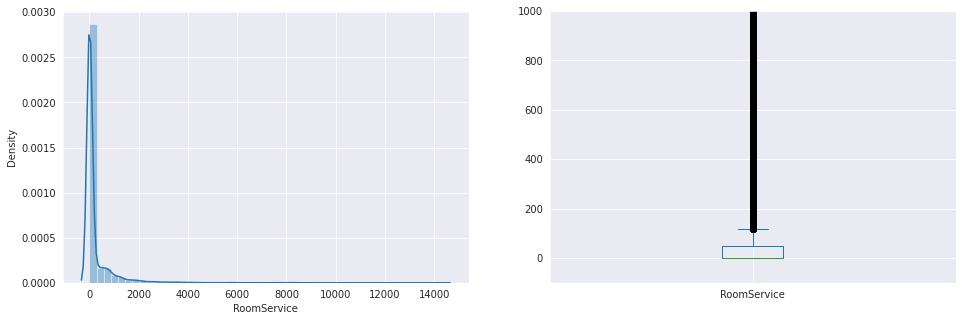

In [9]:
# Visualize RoomService variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['RoomService']);
plt.subplot(122)
train_df['RoomService'].plot.box(figsize = (16, 5));
plt.ylim([-100, 1000])
plt.show()

*Spa*

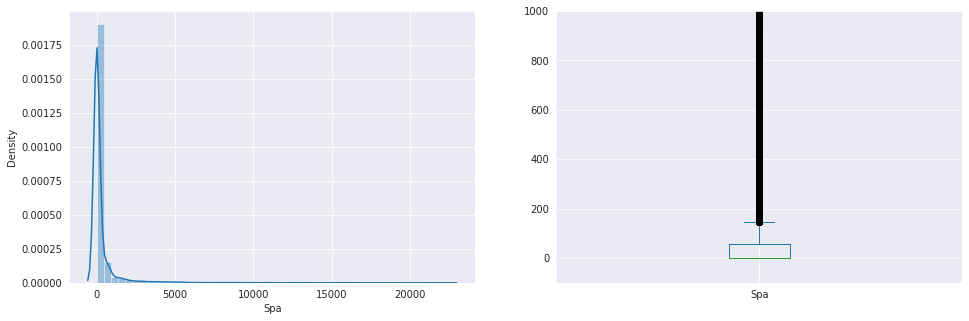

In [10]:
# Visualize Spa variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['Spa']);
plt.subplot(122)
train_df['Spa'].plot.box(figsize = (16, 5));
plt.ylim([-100, 1000])
plt.show()

*VRDeck*

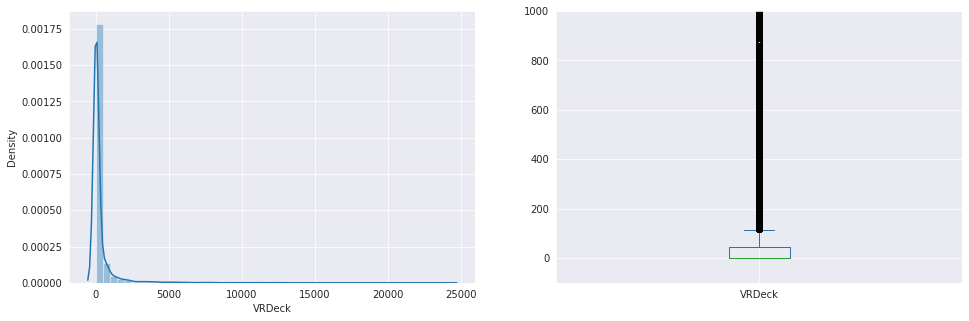

In [11]:
# Visualize VRDeck variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['VRDeck']);
plt.subplot(122)
train_df['VRDeck'].plot.box(figsize = (16, 5));
plt.ylim([-100, 1000])
plt.show()

*FoodCourt*

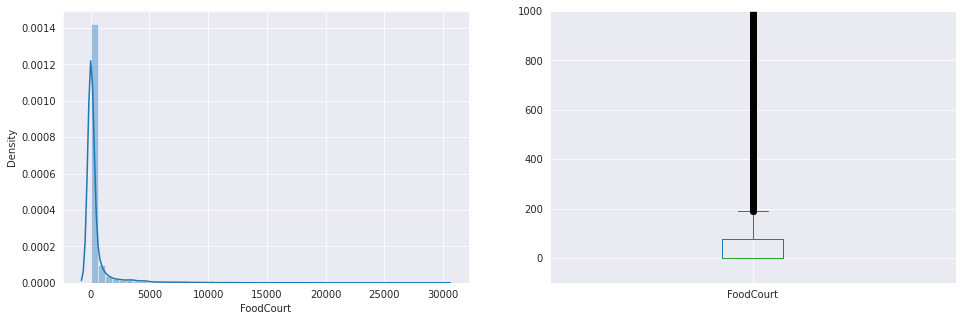

In [12]:
# Visualize FoodCourt variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['FoodCourt']);
plt.subplot(122)
train_df['FoodCourt'].plot.box(figsize = (16, 5));
plt.ylim([-100, 1000])
plt.show()

*ShoppingMall*

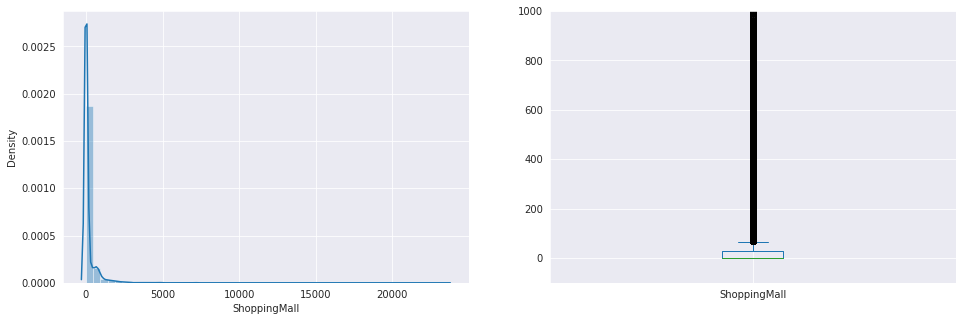

In [13]:
# Visualize ShoppingMall variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train_df['ShoppingMall']);
plt.subplot(122)
train_df['ShoppingMall'].plot.box(figsize = (16, 5));
plt.ylim([-100, 1000])
plt.show()

> RoomService, Spa, VRDeck, FoodCourt และ ShoppingMall มีการกระจายที่ใกล้เคียงกัน โดยจะเห็นว่าผู้โดยสารส่วนใหญ่แทบจะไม่มีการใช้จ่ายจากการใช้งานสิ่งอำนวยความสะดวกบนยานเลย 

* **Target Variable**
    
    ทำการตรวจสอบจำนวนเปอร์เซ็นต์ของผู้โดยสารที่ถูกย้ายไปยังมิติอื่น เพื่อให้แน่ใจว่าชุดข้อมูลจะไม่มีปัญหาเรื่อง Imbalance Class หรือการที่มีคลาสใดคลาสหนึ่งมากจนเกินไป ซึ่งจะส่งผลทำให้ความแม่นยำตอนที่เราจะทำนายมีค่าคลาดเคลื่อนไป

*Transported*

Text(0.5, 1.0, 'Target distribution')

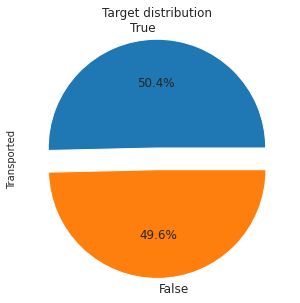

In [14]:
# Visualize Transported variable
plt.figure(figsize=(5,5))
train_df['Transported'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',textprops={'fontsize':12}).set_title("Target distribution")


**Bivariate Analysis** 

หาความสัมพันธ์ระหว่างตัวแปรทั้งหมดกับตัวแปรเป้าหมาย (Transported)

*Categorical Variable vs Target Variable*

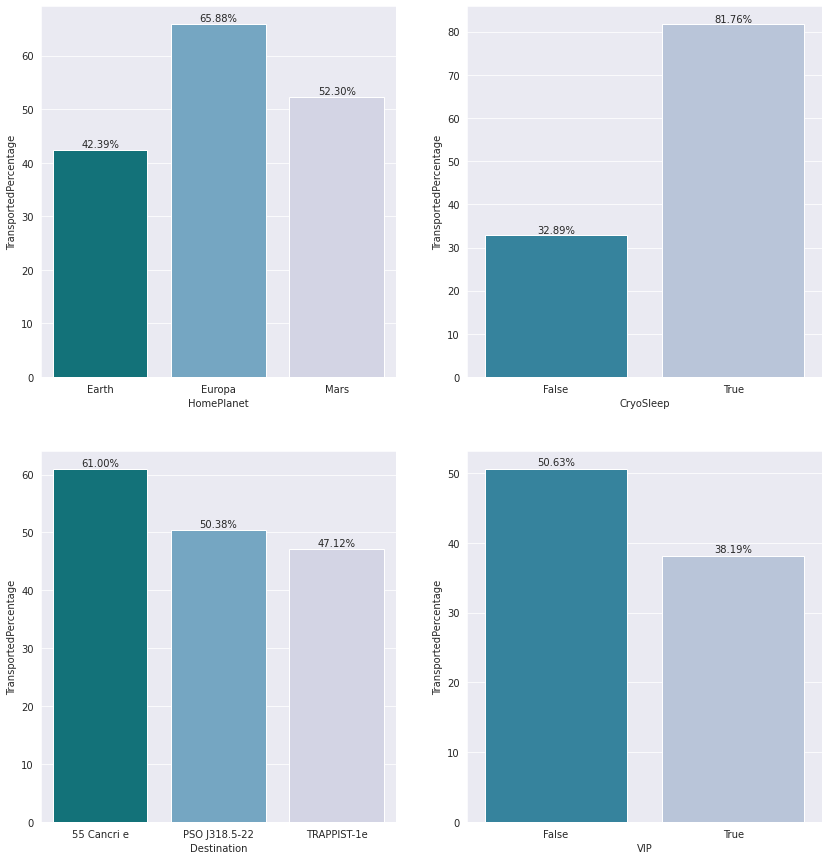

In [15]:
# HomePlanet vs Transported
HomePlanet_Transported = train_df1.groupby('HomePlanet').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

HomePlanet_Transported['TransportedPercentage'] = (HomePlanet_Transported['Transported'] / HomePlanet_Transported['PassengerId']) *100
# Plot HomePlanet vs Transported
plt.figure(figsize = (14, 15))
plt.subplot(221)
ax = sns.barplot(x = "HomePlanet", y = "TransportedPercentage", data = HomePlanet_Transported, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.5
   ax.annotate('{:.2f}%'.format(HomePlanet_Transported['TransportedPercentage'][i]), (x, y), ha='center')


# CryoSleep vs Transported
CryoSleep_Transported = train_df1.groupby('CryoSleep').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CryoSleep_Transported['TransportedPercentage'] = (CryoSleep_Transported['Transported'] / CryoSleep_Transported['PassengerId'])*100
# Plot CryoSleep vs Transported
plt.subplot(222)
ax = sns.barplot(x = "CryoSleep", y = "TransportedPercentage", data = CryoSleep_Transported, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.5
   ax.annotate('{:.2f}%'.format(CryoSleep_Transported['TransportedPercentage'][i]), (x, y), ha='center')


# Destination vs Transported
Destination_Transported = train_df1.groupby('Destination').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

Destination_Transported['TransportedPercentage'] = (Destination_Transported['Transported'] / Destination_Transported['PassengerId'])*100
# Plot Destination vs Transported
plt.subplot(223)
ax = sns.barplot(x = "Destination", y = "TransportedPercentage", data = Destination_Transported, order = Destination_Transported.sort_values('TransportedPercentage', ascending = False).Destination, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.5
   ax.annotate('{:.2f}%'.format(Destination_Transported['TransportedPercentage'][i]), (x, y), ha='center')

# VIP vs Transported
VIP_Transported = train_df1.groupby('VIP').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

VIP_Transported['TransportedPercentage'] = (VIP_Transported['Transported'] / VIP_Transported['PassengerId'])*100
# Plot VIP vs Transported
plt.subplot(224)
ax = sns.barplot(x = "VIP", y = "TransportedPercentage", data = VIP_Transported, order = VIP_Transported.sort_values('TransportedPercentage', ascending = False).VIP, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.5
   ax.annotate('{:.2f}%'.format(VIP_Transported['TransportedPercentage'][i]), (x, y), ha='center')


> จากกราฟจะเห็นว่า
>* HomePlanet vs Transported 
>  - ผู้โดยสารที่มาจาก Europa จะถูก Transported มากเป็นอันดับแรก โดยมีโอกาสประมาณ 65.88%, ผู้โดยสารที่มาจาก Mars จะมีโอกาสถูก Transported เป็นอันดับที่สอง โดยมีโอกาสประมาณ 52.30% และผู้โดยสารที่มาจาก Earth จะถูก Transported เป็นอันดับสุดท้าย โดยมีโอกาสประมาณ 42.39%
>* CryoSleep vs Transported 
>  - ผู้โดยสารที่อยู่ใน CryoSleep จะถูก Transported มากกว่าผู้โดยสารที่ไม่อยู่ใน CryoSleep โดยมีโอกาสประมาณ 81.76% และผู้โดยสารที่ไม่อยู่ใน CryoSleep มีโอกาสประมาณ 32.89%
>* Destination vs Transported 
>  - ผู้โดยสารที่จะเดินทางไป 55 Cancri e จะมีโอกาสถูก Transported ไปเป็นอันดับแรก โดยมีโอกาสประมาณ 61.00% ผู้โดยสารที่เดินทางไป PSO J318.5-22 จะมีโอกาสถูก Transported ไปเป็นอันดับที่สอง โดยมีโอกาสประมาณ 50.38% และผู้โดยสารที่เดินทางไป TRAPPIST-1e จะมีโอกาสถูก Transported ไปเป็นอันดับสุดท้าย โดยมีโอกาสประมาณ 47.12%
>* VIP vs Transported 
>  - ผู้โดยสารที่ไม่เป็น VIP จะมีโอกาสถูก Transported มากกว่าผู้โดยสารที่เป็น VIP โดยมีโอกาสประมาณ 50.63% และผู้โดยสารที่เป็น VIP มีโอกาสประมาณ 38.19%


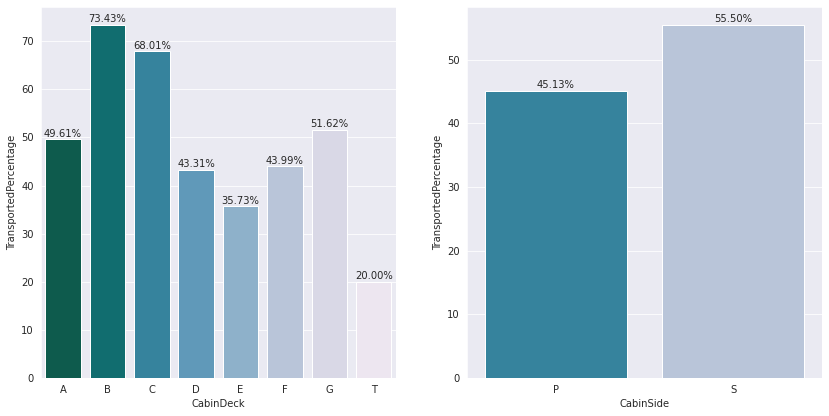

In [16]:
# CabinDeck vs Transported
CabinDeck_Transported = train_df1.groupby('CabinDeck').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinDeck_Transported['TransportedPercentage'] = CabinDeck_Transported['Transported'] / CabinDeck_Transported['PassengerId']*100
# Plot CabinDeck vs Transported
plt.figure(figsize = (14, 15)) 
plt.subplot(221)
ax = sns.barplot(x = "CabinDeck", y = "TransportedPercentage", data = CabinDeck_Transported, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.5
   ax.annotate('{:.2f}%'.format(CabinDeck_Transported['TransportedPercentage'][i]), (x, y), ha='center')


# CabinSide vs Transported
CabinSide_Transported = train_df1.groupby('CabinSide').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

CabinSide_Transported['TransportedPercentage'] = CabinSide_Transported['Transported'] / CabinSide_Transported['PassengerId']*100
# Plot CabinSide vs Transported
plt.subplot(222)
ax = sns.barplot(x = "CabinSide", y = "TransportedPercentage", data = CabinSide_Transported, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.5
   ax.annotate('{:.2f}%'.format(CabinSide_Transported['TransportedPercentage'][i]), (x, y), ha='center')

> จากกราฟจะเห็นว่า
>* CabinDeck vs Transported 
>  - ผู้โดยสารที่อยู่ชั้น B จะมีโอกาสถูก Transported มากที่สุด โดยมีโอกาสประมาณ 73.43%, ผู้โดยสารที่อยู่ชั้น C จะมีโอกาสประมาณ 68.01% ในการถูก Transported, ผู้โดยสารที่อยู่ชั้น G จะมีโอกาสประมาณ 51.62% ในการถูก Transported, ผู้โดยสารที่อยู่ชั้น A จะมีโอกาสประมาณ 49.61% ในการถูก Transported, ผู้โดยสารที่อยู่ชั้น F จะมีโอกาสประมาณ 43.99% ในการถูก Transported, ผู้โดยสารที่อยู่ชั้น D จะมีโอกาสประมาณ 43.31% ในการถูก Transported, ผู้โดยสารที่อยู่ชั้น E จะมีโอกาสประมาณ 35.73% ในการถูก Transported และผู้โดยสารที่อยู่ชั้น T จะมีโอกาสประมาณ 20.00% ในการถูก Transported
>* CabinSide vs Transported 
>  - ผู้โดยสารที่อยู่ฝั่ง Starboard จะมีโอกาสถูก Transported มากกว่าผู้โดยสารที่อยู่ฝั่ง Port โดยฝั่ง Starboard มีโอกาสถูก Transported ประมาณ 55.50% และฝั่ง Port มีโอกาสถูก Transported ประมาณ 45.13%

*นำ ‘PassengerId’ มาทำการแยกข้อมูล แล้วนำไปจัดไปเก็บไว้ใน Feature ชื่อ ‘Group’ จากนั้นทำการจัดกลุ่ม ‘Group’ กับ ‘PassengerId’ ที่ผ่านการรวมกลุ่มแล้ว แล้วนำมาเก็บไว้ใน ‘NumInGroup’ จากนั้นเปลี่ยนชื่อ ‘PassengerId’ เป็น ‘Group_size’*

In [17]:
# Extract Group column from PassengerId column
train_df1["Group"] = train_df1["PassengerId"].str.split('_', expand = True)[0]
# Create dataframe NumGroup that contains the PassengerGroup and the number of passengers in the group 
NumInGroup = train_df1.groupby('Group').aggregate({'PassengerId': 'size'}).reset_index()
NumInGroup = NumInGroup.rename(columns = {"PassengerId": "Group_size"})
train_df1 = train_df1.merge(NumInGroup[["Group", "Group_size"]], how = 'left', on = ['Group'])

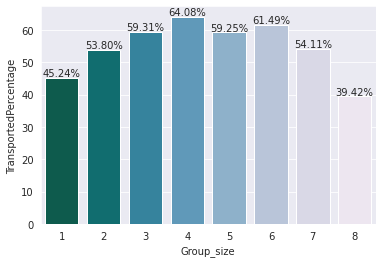

In [18]:
# Group_size vs transported
Groupsize_Transported = train_df1.groupby('Group_size').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

Groupsize_Transported['TransportedPercentage'] = Groupsize_Transported['Transported'] / Groupsize_Transported['PassengerId']*100

# Plot Group_size vs transported
ax = sns.barplot(x = "Group_size", y = "TransportedPercentage", data = Groupsize_Transported, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.5
   ax.annotate('{:.2f}%'.format(Groupsize_Transported['TransportedPercentage'][i]), (x, y), ha='center')

> จากกราฟจะเห็นว่า กลุ่มผู้โดยสารที่มาด้วยกัน 4 คนจะมีโอกาสถูก Transported มากเป็นอันดับแรก โดยมีโอกาสประมาณ 64.08%, กลุ่มผู้โดยสารที่มาด้วยกัน 6 คนจะมีโอกาสถูก Transported มากเป็นอันดับสอง โดยมีโอกาสประมาณ 61.49%, กลุ่มผู้โดยสารที่มาด้วยกัน 3 คนจะมีโอกาสถูก Transported มากเป็นอันดับสาม โดยมีโอกาสประมาณ 59.31%, กลุ่มผู้โดยสารที่มาด้วยกัน 5 คนจะมีโอกาสถูก Transported มากเป็นอันดับสี่ โดยมีโอกาสประมาณ 59.25%, กลุ่มผู้โดยสารที่มาด้วยกัน 7 คนจะมีโอกาสถูก Transported มากเป็นอันดับห้า โดยมีโอกาสประมาณ 54.11%, กลุ่มผู้โดยสารที่มาด้วยกัน 2 คนจะมีโอกาสถูก Transported มากเป็นอันดับหก โดยมีโอกาสประมาณ 53.80%, ผู้โดยสารที่มาคนเดียวจะมีโอกาสถูก Transported มากเป็นอันดับเจ็ด โดยมีโอกาสประมาณ 45.24% และกลุ่มผู้โดยสารที่มาด้วยกัน 8 คนจะมีโอกาสถูก Transported มากเป็นอันดับสุดท้าย โดยมีโอกาสประมาณ 39.42%

*ต่อไปจะเป็นการสร้าง Feature ใหม่ ชื่อ ‘ItSolo’ ซึ่งแบ่งได้เป็น Group และ Solo*

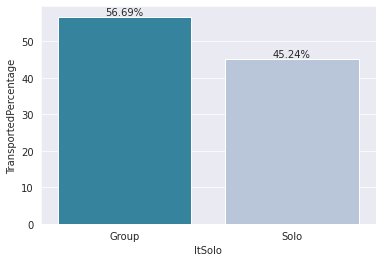

In [19]:
# New feature - ItSolo 
NumInGroup["ItSolo"] = NumInGroup["Group_size"].apply(lambda x: "Group" if x > 1 else "Solo")
train_df1 = train_df1.merge(NumInGroup[["Group", "ItSolo"]], how = 'left', on = ['Group'])

# ItSolo vs transported
Solo_Transported = train_df1.groupby('ItSolo').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe Solo_Transported that contains percentage of passengers transported Solo or Group
Solo_Transported['TransportedPercentage'] = Solo_Transported['Transported'] / Solo_Transported['PassengerId']*100
# Plot ItSolo vs transported
ax = sns.barplot(x = "ItSolo", y = "TransportedPercentage", data = Solo_Transported, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.5
   ax.annotate('{:.2f}%'.format(Solo_Transported['TransportedPercentage'][i]), (x, y), ha='center')

> จากกราฟจะเห็นว่า ผู้โดยสารที่มาเป็นกลุ่มจะถูก Transported มากกว่าผู้โดยสารที่มาคนเดียว โดยมีโอกาสประมาณ 56.69% และผู้โดยสารที่มาคนเดียวมีโอกาสประมาณ 45.24%

*นำ ‘Name’ มาทำการแยกข้อมูล แล้วนำไปจัดไปเก็บไว้ใน Feature ชื่อ ‘FamilyName’ จากนั้นสร้าง Feature ‘NumRelatives’ ซึ่งมีการจับกลุ่ม ‘FamilyName’ กับ ‘PassengerId’ แล้วทำการนับจำนวนทั้งหมด หลังจากนั้นจะทำการเปลี่ยนชื่อ columns จาก ‘PassengerId’ เป็น ‘NumRelatives’ และสร้าง Feature ชื่อ ‘FamilySize’ โดยแบ่งข้อมูลออกเป็น 4 ส่วน ซึ่งได้แก่จำนวนสมาชิกในครอบครัวในช่วง 0 - 2 คน, 3 - 5 คน, 6 - 10 คน และ 11 - 20 คน*

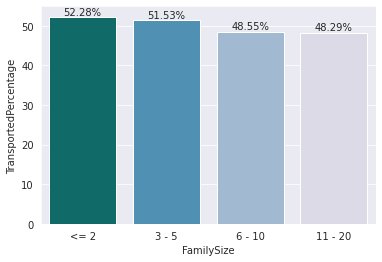

In [20]:
# Extract FamilyName column from Name column
train_df1["FamilyName"] = train_df1["Name"].str.split(' ', expand = True)[1]

# Create dataframe -NoRelatives that contains the FamilyName and the number of relatives in a Family
NoRelatives = train_df1.groupby('FamilyName')['PassengerId'].count().reset_index()
NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NumRelatives"})

train_df1 = train_df1.merge(NoRelatives[["FamilyName", "NumRelatives"]], how = 'left', on = ['FamilyName'])

train_df1["FamilySize"] = pd.cut(train_df1.NumRelatives, bins = [0, 2, 5, 10, 20], labels = ['<= 2', '3 - 5', '6 - 10', '11 - 20'])

# FamilySize vs transported
FamilySize_Transported = train_df1.groupby('FamilySize').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

FamilySize_Transported['TransportedPercentage'] = FamilySize_Transported['Transported'] / FamilySize_Transported['PassengerId']*100

# Plot FamilySize vs transported
ax = sns.barplot(x = "FamilySize", y = "TransportedPercentage", data = FamilySize_Transported, order = FamilySize_Transported.sort_values('TransportedPercentage', ascending = False).FamilySize, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.5
   ax.annotate('{:.2f}%'.format(FamilySize_Transported['TransportedPercentage'][i]), (x, y), ha='center')

>จากกราฟจะเห็นว่า
>
> จำนวนสมาชิกในครอบครัวน้อยกว่า 3 คน มีโอกาสถูก Transported เป็นอันดับแรก โดยมีโอกาสประมาณ 52.28%, จำนวนสมาชิกในครอบครัวตั้งแต่ 3 - 5 คน มีโอกาสถูก Transported เป็นอันดับสอง โดยมีโอกาสประมาณ 51.53%, จำนวนสมาชิกในครอบครัวตั้งแต่ 6 - 10 คน มีโอกาสถูก Transported เป็นอันดับที่สาม มีโอกาสประมาณ 48.55% และจำนวนสมาชิกในครอบครัวตั้งแต่ 11 - 20 คน มีโอกาสถูก Transported เป็นอันดับสุดท้าย มีโอกาสประมาณ 48.29% 


*ทำการแบ่งช่วงอายุ โดยแบ่งเป็นช่วง '0 - 4', '5 - 12', '13 - 19', '20 - 40', '41 - 60', '61 - 80'*

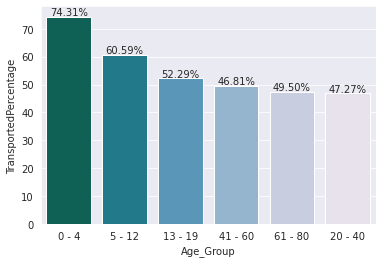

In [21]:
# Extract Age_Group column from Age column
train_df1["Age_Group"] = pd.cut(train_df1.Age, bins = [0.0, 4.0, 12.0, 19.0, 40.0, 60.0, 80.0], labels = ['0 - 4', '5 - 12', '13 - 19', '20 - 40', '41 - 60', '61 - 80'])

# AgeGroup vs Transported
AgeGroup_Transported = train_df1.groupby('Age_Group').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'size'
                                                          }).reset_index()

# create dataframe AgeGroup_Transported that has the Age Group and the percentage transported
AgeGroup_Transported['TransportedPercentage'] = AgeGroup_Transported['Transported'] / AgeGroup_Transported['PassengerId']*100

# Plot AgeGroup vs transported
ax = sns.barplot(x = "Age_Group", y = "TransportedPercentage", data = AgeGroup_Transported, order = AgeGroup_Transported.sort_values('TransportedPercentage',ascending = False).Age_Group, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.5
   ax.annotate('{:.2f}%'.format(AgeGroup_Transported['TransportedPercentage'][i]), (x, y), ha='center')

>จากกราฟจะเห็นได้ว่า
>
> ช่วงอายุตั้งแต่ 0 - 4  ปี มีโอกาสถูก Transported เป็นอันดับแรก คือ 74.31%, ช่วงอายุตั้งแต่ 5 - 12 ปี มีโอกาสถูก Transported เป็นอันดับที่สอง คือ 60.59%, ช่วงอายุตั้งแต่   
13 - 19 ปี มีโอกาสถูก Transported เป็นอันดับที่สาม คือ 52.29%, ช่วงอายุตั้งแต่ 41 - 60 ปี มีโอกาสถูก Transported เป็นอันดับที่สี่ คือ 46.81%, ช่วงอายุตั้งแต่ 61 - 80 ปี มีโอกาสถูก Transported เป็นอันดับที่ห้า คือ 49.50% และช่วงอายุตั้งแต่ 20 - 40 ปี มีโอกาสถูก Transported เป็นอันดับสุดท้าย คือ 47.27%

*ทำการรวมค่าใช้จ่ายทั้งหมด และเทียบกับช่วงอายุ*

(-800.0, 12000.0)

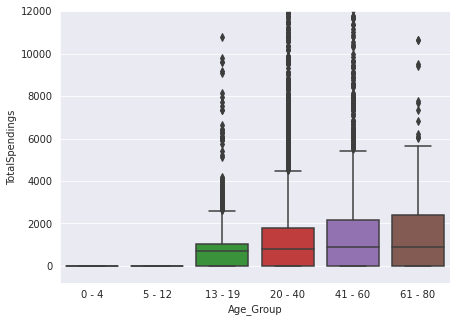

In [22]:
# Create total spending feature
train_df1["TotalSpendings"] = train_df1["FoodCourt"] + \
                                 train_df1["ShoppingMall"] + \
                                 train_df1["RoomService"] + \
                                 train_df1["Spa"] + \
                                 train_df1["VRDeck"]

# Plot AgeGroup vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df1, x = "Age_Group", y = "TotalSpendings")
plt.ylim([-800, 12000])

> จากกราฟจะเห็นได้ว่า ผู้โดยสารที่มีอายุน้อยกว่า 13 ปีจะไม่มีค่าใช้จ่ายและค่าใช้จ่ายจะเพิ่มขึ้นตามอายุของผู้โดยสาร

(-800.0, 12000.0)

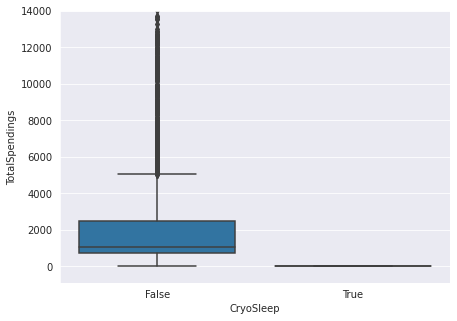

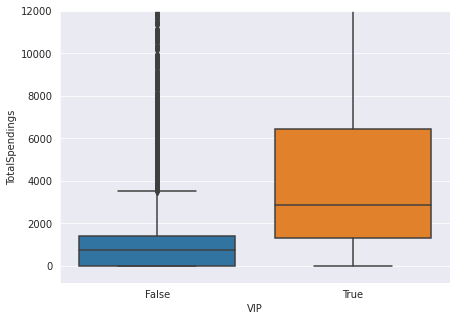

In [23]:
# Plot CryoSleep, VIP vs TotalSpendings
plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df1, x = "CryoSleep", y = "TotalSpendings")
plt.ylim([-900, 14000])

plt.figure(figsize = (7, 5))
sns.boxplot(data = train_df1, x = "VIP", y = "TotalSpendings")
plt.ylim([-800, 12000])

>จาก Box plot จะเห็นว่า
>
>* CryoSleep vs TotalSpendings
>  * ผู้โดยสารใน CryoSleep จะไม่มีค่าใช้จ่าย
>* VIP vs TotalSpendings
>  * ผู้โดยสารที่เป็น VIP จะมีค่าใช้จ่ายสูงกว่าผู้โดยสารคนอื่น ๆ


# Cleaning and Preprocessing

In [24]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     8693 non-null   object  
 1   HomePlanet      8492 non-null   object  
 2   CryoSleep       8476 non-null   object  
 3   Cabin           8494 non-null   object  
 4   Destination     8511 non-null   object  
 5   Age             8514 non-null   float64 
 6   VIP             8490 non-null   object  
 7   RoomService     8512 non-null   float64 
 8   FoodCourt       8510 non-null   float64 
 9   ShoppingMall    8485 non-null   float64 
 10  Spa             8510 non-null   float64 
 11  VRDeck          8505 non-null   float64 
 12  Name            8493 non-null   object  
 13  Transported     8693 non-null   bool    
 14  CabinDeck       8494 non-null   object  
 15  CabinNo.        8494 non-null   object  
 16  CabinSide       8494 non-null   object  
 17  Group         

*ลบ Features ที่สร้างใหม่ในขั้นตอน EDA เพื่อเตรียมรวม train และ test data เข้าด้วยกัน*

In [25]:
train_df2 = train_df1.copy()

# drop features created during EDA
train_df2 = train_df2.drop(["Group",
                            "CabinDeck",
                            "CabinNo.",
                            "CabinSide",
                            "FamilyName",
                            "NumRelatives",                              
                            "FamilySize",
                            "Age_Group",
                            "Group_size",
                            "TotalSpendings",
                            "ItSolo"], axis = 1)
                            

In [26]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 1.2+ MB


*เก็บข้อมูล Transported ไว้ในตัวแปร target
และ PassengerId ไว้ในตัวแปร test_id* 
*ลบคอลัมน์ Transported แล้วทำการรวม train และ test set เข้าด้วยกันเพื่อความง่ายต่อการทำความสะอาดข้อมูล*


In [27]:
# save target variable in train dataset and save it in target
target = train_df2["Transported"]

# save test PassengerId in test_id
test_id = test_df["PassengerId"]

# drop Transported variable from the train set
train_df3 = train_df2.drop(["Transported"], axis = 1)

# Join the train and test set 
data = pd.concat([train_df3, test_df], axis = 0).reset_index(drop = True)

**Percentage of missing values in each columns**

*จากขั้นตอนก่อนหน้านี้เป็นการเตรียมข้อมูลเพื่อที่จะนำมาทำความสะอาด สำหรับขั้นตอนนี้จะเป็นการหาค่าเปอร์เซ็นต์ (%) ของ missing values ในแต่ละ columns*

In [28]:
round(data.isna().sum() * 100/data.shape[0], 3)

PassengerId     0.000
HomePlanet      2.221
CryoSleep       2.390
Cabin           2.305
Destination     2.113
Age             2.082
VIP             2.282
RoomService     2.028
FoodCourt       2.228
ShoppingMall    2.359
Spa             2.190
VRDeck          2.066
Name            2.267
dtype: float64

> จะเห็นได้ว่ามี missing values ในแต่ละ Feature อยู่ประมาณ 2%

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


**Fill Categorical Features**


*ทำการเก็บ list ของ Categorical Features จากการเลือก data type ที่เป็น object โดยจะเก็บไว้ที่ list_missing_cat_columns*

In [30]:
# get categorical columns in train dataset with missing values and store in list_missing_cat_columns
data_1 = data.copy()

list_missing_cat_columns = list((data_1.select_dtypes(['object']).isna().sum() > 0).index)
list_missing_cat_columns

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

*ทำการเติมข้อมูลที่หายไปของ Categorical Features โดยใช้ mode*

In [31]:
# Fill Categorical columns in data with mode
for col in list_missing_cat_columns:
    data_1[col] = data_1[col].fillna(data_1[col].mode()[0])

**Fill missing values for numeric columns**

*ทำการเก็บ list ของ  Numeric Features จากการเลือก data type ที่เป็น number โดยจะเก็บไว้ที่ list_missing_numeric_columns*

In [32]:
# get numeric columns with missing values and store in lst_missing_numeric_col
list_missing_numeric_col = list((data_1.select_dtypes(np.number).isna().sum() > 0).index)
list_missing_numeric_col

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

*จากการทำ EDA จะพบว่า ผู้โดยสารที่มีอายุต่ำกว่า 13 ปี หรือผู้โดยสารที่อยู่ใน CryoSleep จะไม่มีค่าใช้จ่าย  ดังนั้นจะแทนที่ missing values ด้วย 0 หากพบว่าเป็นผู้ที่มีอายุต่ำกว่า 13 ปี หรือ อยู่ใน CryoSleep รวมไปถึงใช้บริการสิ่งอำนวยความสะดวกบนยาน*

In [33]:
# Filling NaNs based on Age
def fill_nans_by_age_and_cryosleep(df):
    df["RoomService"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["RoomService"])
    df["FoodCourt"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["FoodCourt"])
    df["ShoppingMall"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["ShoppingMall"])
    df["Spa"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["Spa"])
    df["VRDeck"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["VRDeck"])
    
    return df

data_1 = fill_nans_by_age_and_cryosleep(data_1)

* Fill numeric columns in dataset with mean.

*แทนที่ missing value ด้วยค่าเฉลี่ย(mean) ใน Numeric columns*

In [34]:
for col in list_missing_numeric_col:
    data_1[col] = data_1[col].fillna(data_1[col].mean())
data_1.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

> ทำการเติม missing Values เสร็จทั้งหมดในขั้นตอนนี้

**Outlier Treatment**

*สร้างฟังก์ชันจัดการกับ Outlier ที่เกิดขึ้นในค่าใช้จ่ายต่าง ๆ โดยใช้ Quantile ที่ 0.99 มาหาค่า threshold ที่เหมาะในแต่ละ columns เมื่อค่าใน columns นั้น ๆ มีค่ามากกว่า Quantile ที่ 0.99 จะแทนค่านั้น ๆ ด้วยค่า threshold*

In [35]:
# clip outliers on 99% quantile
def clipping_quantile(dataframe, quantile_values = None, quantile = 0.99):
    df = dataframe.copy()
    if quantile_values is None:
        quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(quantile)
    for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        df[num_column] = num_values
    return df      
    
data_1 = clipping_quantile(data_1, None, 0.99)

# Feature Extraction and Feature Selection

* *สร้าง Dataframe ชื่อว่า ‘NumInGroup’ ที่ประกอบด้วย ‘Group’ และ ‘Group_size’*
* *สร้าง Feature ชื่อ ‘ItSolo’ ในกรณีที่ ‘Group_size’ มีค่ามากกว่า 1 จะให้เป็น Group ถ้าไม่ใช่จะให้เป็น Solo แล้วทำการรวม 2 Features คือ ‘Group’ และ ‘ItSolo’ เข้าด้วยกัน* 
* *สร้าง Feature ชื่อ ‘CabinDeck’ ที่จะทำการแบ่งข้อมูลจาก ‘Cabin’ โดยใช้ ‘/’ เป็นตัวแบ่ง*
* *สร้าง Feature ชื่อ ‘DeckPosition’ ที่จะคืนค่าเป็น Lower เมื่อ deck อยู่ในชั้น A, B, C, D ถ้าไม่ใช่จะคืนค่าเป็น Higher* 
* *สร้าง Feature ชื่อ ‘CabinSide’ ที่จะทำการแบ่งข้อมูลจาก ‘Cabin’ โดยใช้ ‘/’ เป็นตัวแบ่ง*
* *สร้าง Feature ชื่อ ‘Regular’ ซึ่งประกอบด้วย ‘FoodCourt’ และ ‘ShoppingMall’*
* *สร้าง Feature ชื่อ ‘Luxury’ ซึ่งประกอบด้วย ‘RoomService’, ‘Spa’ และ ‘VRDeck’*
* *สร้าง Feature ชื่อ ‘TotalSpendings’ ซึ่งประกอบด้วย ‘RoomService’, ‘FoodCourt’, ‘ShoppingMall’, ‘Spa’ และ ‘VRDeck’ หลังจากนั้นสร้างตัวแปร ‘Wealthiest_Deck’ ใช้สำหรับจับกลุ่ม ‘CabinDeck’ และรวมผลรวมจาก ‘TotalSpendings’ และขนาดของ ‘PassengerId’*
* *สร้าง Feature ชื่อ ‘DeckAverageSpent’ เกิดจากการนำผลรวมของ‘TotalSpendings’ หารด้วยจำนวน ‘PassengerId’ ในแต่ละ Deck*
* *ทำการแบ่งข้อมูล Name โดยใช้ ‘ ’ เป็นตัวแบ่งโดยเก็บข้อมูลไว้ใน Feature ที่ชื่อว่า ‘FamilyName’*
* *สร้าง Feature ‘NoRelatives’ ซึ่งมีการจับกลุ่ม ‘FamilyName’ กับ ‘PassengerId’ แล้วทำการนับจำนวนทั้งหมด หลังจากนั้นจะทำการเปลี่ยนชื่อ columns จาก ‘PassengerId’ เป็น ‘NumRelatives’*
* *สร้าง Feature ‘FamilySize’ โดยแบ่งข้อมูลออกเป็น 4 ส่วน ซึ่งได้แก่จำนวนสมาชิกในครอบครัวในช่วง 0 - 2 คน, 3 - 5 คน, 6 - 10 คน และ 11 - 20 คน*

In [36]:
def extract_features(df):
    df["Group"] = (df["PassengerId"].str.split('_', expand = True))[0]
    
    # Create dataframe NumGroup that contains the PassengerGroup and the number of passengers in the group 
    NumInGroup = df.groupby('Group').aggregate({'PassengerId': 'size'}).reset_index()
    NumInGroup = NumInGroup.rename(columns = {"PassengerId": "Group_size"})
   
    # Create ItSolo feature
    NumInGroup["ItSolo"] = NumInGroup["Group_size"].apply(lambda x: "Group" if x > 1 else "Solo")
    df = df.merge(NumInGroup[["Group", "ItSolo"]], how = 'left', on = ['Group'])
    
    # Create CabinDeck feature
    df["CabinDeck"] = df["Cabin"].str.split('/', expand = True)[0]
    # Create DeckPosition feature
    df["DeckPosition"] = df["CabinDeck"].apply(lambda deck: "Lower" if deck in ('A', 'B', 'C', 'D') else "Higher" )
    # Create CabinSide feature
    df["CabinSide"] = df["Cabin"].str.split('/', expand = True)[2]
    
    # Create Regular feature
    df["Regular"] = df["FoodCourt"] + df["ShoppingMall"] 
    # Create Luxury feature
    df["Luxury"] = df["RoomService"] + df["Spa"] + df["VRDeck"]
    # Create TotalSpendings feature
    df["TotalSpendings"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]
    
    Wealthiest_Deck = df.groupby('CabinDeck').aggregate({'TotalSpendings': 'sum', 'PassengerId': 'size'}).reset_index()

    # Create DeckAverageSpent feature
    Wealthiest_Deck['DeckAverageSpent'] = Wealthiest_Deck['TotalSpendings'] / Wealthiest_Deck['PassengerId']
    
    df = df.merge(Wealthiest_Deck[["CabinDeck", "DeckAverageSpent"]], how = 'left', on = ['CabinDeck'])
    
    df["FamilyName"] = df["Name"].str.split(' ', expand = True)[1]
    
    # Create NoRelatives feature
    NoRelatives = df.groupby('FamilyName')['PassengerId'].count().reset_index()
    NoRelatives = NoRelatives.rename(columns = {"PassengerId": "NumRelatives"})    
    df = df.merge(NoRelatives[["FamilyName", "NumRelatives"]], how = 'left', on = ['FamilyName'])
   
    # Create FamilySize feature
    df["FamilySize"] = pd.cut(df.NumRelatives, bins = [0, 2, 5, 10, 300], labels = ['0 - 2', '3 - 5', '6 - 10', '11 - 20'])
    
    return df

data_2 = data_1.copy()
data_2 = extract_features(data_2)

In [37]:
data_2

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,ItSolo,CabinDeck,DeckPosition,CabinSide,Regular,Luxury,TotalSpendings,DeckAverageSpent,FamilyName,NumRelatives,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.00,0.0,Maham Ofracculy,0001,Solo,B,Lower,P,0.0,0.00,0.00,2425.390365,Ofracculy,3,3 - 5
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.00,44.0,Juanna Vines,0002,Solo,F,Higher,S,34.0,702.00,736.00,988.676218,Vines,4,3 - 5
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,5382.86,49.0,Altark Susent,0003,Group,A,Lower,S,3576.0,5474.86,9050.86,3021.123690,Susent,7,6 - 10
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.00,193.0,Solam Susent,0003,Group,A,Lower,S,1654.0,3522.00,5176.00,3021.123690,Susent,7,6 - 10
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.00,2.0,Willy Santantines,0004,Solo,F,Higher,S,221.0,870.00,1091.00,988.676218,Santantines,9,6 - 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.00,0.0,Jeron Peter,9266,Group,G,Higher,S,0.0,0.00,0.00,455.663879,Peter,10,6 - 10
12966,9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.00,144.0,Matty Scheron,9269,Solo,G,Higher,P,864.0,154.00,1018.00,455.663879,Scheron,6,6 - 10
12967,9271_01,Mars,True,D/296/P,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.00,0.0,Jayrin Pore,9271,Solo,D,Lower,P,0.0,0.00,0.00,2221.504384,Pore,4,3 - 5
12968,9273_01,Europa,False,D/297/P,TRAPPIST-1e,28.771969,False,0.0,2680.0,0.0,0.00,523.0,Kitakan Conale,9273,Solo,D,Lower,P,2680.0,523.00,3203.00,2221.504384,Conale,7,6 - 10


In [38]:
data_2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,ItSolo,CabinDeck,DeckPosition,CabinSide,Regular,Luxury,TotalSpendings,DeckAverageSpent,FamilyName,NumRelatives,FamilySize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.00,0.0,Maham Ofracculy,0001,Solo,B,Lower,P,0.0,0.00,0.00,2425.390365,Ofracculy,3,3 - 5
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.00,44.0,Juanna Vines,0002,Solo,F,Higher,S,34.0,702.00,736.00,988.676218,Vines,4,3 - 5
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,5382.86,49.0,Altark Susent,0003,Group,A,Lower,S,3576.0,5474.86,9050.86,3021.123690,Susent,7,6 - 10
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.00,193.0,Solam Susent,0003,Group,A,Lower,S,1654.0,3522.00,5176.00,3021.123690,Susent,7,6 - 10
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.00,2.0,Willy Santantines,0004,Solo,F,Higher,S,221.0,870.00,1091.00,988.676218,Santantines,9,6 - 10


*ทำการ drop ตัวแปรที่ใช้ในการสร้าง Features ที่ไม่มีความเกี่ยวข้องเพื่อลด Outlier จาก Dataset*


In [39]:
data_3 = data_2.copy()
irrelevant_columns = ["Cabin", "PassengerId", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Name", "FamilyName", "Group"]
data_3 = data_3.drop(irrelevant_columns, axis = 1)

data_3.shape

(12970, 15)

 **One hot Encoding**

*แปลงข้อมูลที่เป็น Categorical ให้เป็นข้อมูล Numerical ด้วยวิธี One hot Encoding เนื่องจากคอมพิวเตอร์นั้นสามารถเข้าใจได้เฉพาะตัวเลข โดยข้อมูลที่ Encode แบบ One Hot จะช่วยให้model Machine Learning ทำงานได้ง่ายขึ้น*

In [40]:
# Categorical Encoding
data_3 = pd.get_dummies(data_3, columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinSide', 'ItSolo'])

# Ordinal Encoding
for col in ['CabinDeck', 'DeckPosition', 'FamilySize']:
    data_3[col], _ = data_3[col].factorize()

In [41]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 12969
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        12970 non-null  float64
 1   CabinDeck                  12970 non-null  int64  
 2   DeckPosition               12970 non-null  int64  
 3   Regular                    12970 non-null  float64
 4   Luxury                     12970 non-null  float64
 5   TotalSpendings             12970 non-null  float64
 6   DeckAverageSpent           12970 non-null  float64
 7   NumRelatives               12970 non-null  int64  
 8   FamilySize                 12970 non-null  int64  
 9   HomePlanet_Earth           12970 non-null  uint8  
 10  HomePlanet_Europa          12970 non-null  uint8  
 11  HomePlanet_Mars            12970 non-null  uint8  
 12  CryoSleep_False            12970 non-null  uint8  
 13  CryoSleep_True             12970 non-null  uin

> Features ทั้งหมดที่ใช้ ได้แก่ Age, CabinDeck, DeckPosition, Regular, Luxury, TotalSpendings, DeckAverageSpent, NumRelatives, FamilySize, HomePlanet_Earth, HomePlanet_Europa, HomePlanet_Mars, CryoSleep_False, CryoSleep_True, Destination_55 Cancri e, Destination_PSO J318.5-22, Destination_TRAPPIST-1e, VIP_False, VIP_True, CabinSide_P, CabinSide_S, ItSolo_Group และ ItSolo_Solo

*Split ข้อมูลกลับแล้วตรวจสอบ shape ของข้อมูล train และ test เพื่อให้แน่ใจว่าข้อมูลของเราถูกต้อง*

In [42]:
data_4 = data_3.copy()
train_final = data_4.loc[:train_df.index.max(),  :].copy()
test_final = data_4.loc[train_df.index.max() + 1:, :].reset_index(drop = True).copy()

# print shape of final train data
print(train_final.shape)

# print shape of final test data
print(test_final.shape)

(8693, 23)
(4277, 23)


In [43]:
data_4.head()

,Age,CabinDeck,DeckPosition,Regular,Luxury,TotalSpendings,DeckAverageSpent,NumRelatives,FamilySize,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,CabinSide_P,CabinSide_S,ItSolo_Group,ItSolo_Solo
0,39.0,0,0,0.0,0.00,0.00,2425.390365,3,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1
1,24.0,1,1,34.0,702.00,736.00,988.676218,4,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1
2,58.0,2,0,3576.0,5474.86,9050.86,3021.123690,7,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0
3,33.0,2,0,1654.0,3522.00,5176.00,3021.123690,7,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0
4,16.0,1,1,221.0,870.00,1091.00,988.676218,9,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1


In [44]:
#train_final.info()

In [45]:
#test_final.info()

*ทำการแบ่งข้อมูลที่ใช้ในการ train และ test*

In [46]:
X = train_final.copy()

# save target variable in in y
y = target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 40)

# Model building


*สร้าง Model ที่ใช้ในการทำนาย ได้แก่*

*Logistic Regression               
KNN-Classifier                    
Decision Tree                    
Random Forest                    
Random Forest Tune by Grid Search  
Naive Bayese                             
Stochastics Gradient Descent*

**Logistic Regression**

In [47]:
#Predict our Test data using Logistic Regression
logmodel= LogisticRegression()
logmodel.fit(X_train, y_train)
predicted_lr = logmodel.predict(X_test)
#Evaluate our logistic regression model
print(confusion_matrix(y_test, predicted_lr))
print(classification_report(y_test, predicted_lr))
print(logmodel.score(X_test, y_test))

[[673 207]
 [159 700]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       880
           1       0.77      0.81      0.79       859

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

0.78953421506613


**K-Nearest Neighbor Classifier**

In [48]:
#KNN classifier 
KN_calssifier = KNeighborsClassifier()
KN_calssifier.fit(X_train, y_train)
predicted_kn = KN_calssifier.predict(X_test)
print(confusion_matrix(y_test, predicted_kn))
print(classification_report(y_test, predicted_kn))

[[677 203]
 [194 665]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       880
           1       0.77      0.77      0.77       859

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [49]:
#For loop to try different K values
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

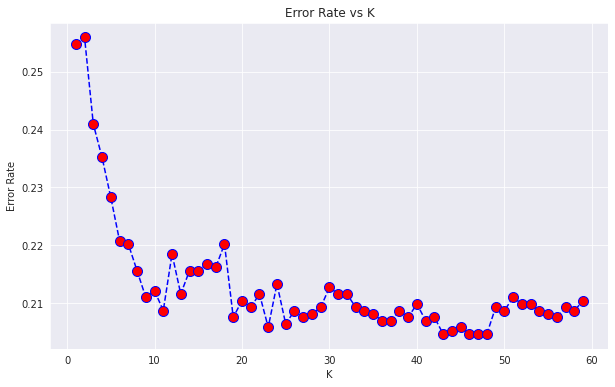

In [50]:
#Plt for-loop
plt.figure(figsize = (10,6))
plt.plot(range(1,60), error_rate, color = 'blue', linestyle = '--', marker = 'o',
        markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel("Error Rate")

In [51]:
#KNN classifier after hypertuning
KN_calssifier = KNeighborsClassifier(n_neighbors=34)
KN_calssifier.fit(X_train, y_train)
predicted_kn = KN_calssifier.predict(X_test)
print(classification_report(y_test, predicted_kn))
print(confusion_matrix(y_test, predicted_kn))
print(KN_calssifier.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       880
           1       0.77      0.82      0.80       859

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

[[669 211]
 [152 707]]
0.7912593444508338


**Decision Tree Classifier**

In [52]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions_dt = dtree.predict(X_test)
print(confusion_matrix(y_test, predictions_dt))
print(classification_report(y_test, predictions_dt))
print(dtree.score(X_test, y_test))

[[654 226]
 [227 632]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       880
           1       0.74      0.74      0.74       859

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739

0.7395054629097182


**Naive Bayes**

In [53]:
NB = GaussianNB()
NB.fit(X_train, y_train)
predictions_nb = NB.predict(X_test)
print(confusion_matrix(y_test, predictions_nb))
print(classification_report(y_test, predictions_nb))
print(NB.score(X_test, y_test))

[[716 164]
 [232 627]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       880
           1       0.79      0.73      0.76       859

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

0.7722829212190915


**Stochastic Gradient Descent**

In [54]:
sgd = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
sgd.fit(X_train, y_train)
predictions_sgd = sgd.predict(X_test)
print(confusion_matrix(y_test, predictions_sgd))
print(classification_report(y_test, predictions_sgd))
print(sgd.score(X_test, y_test))

[[632 248]
 [122 737]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       880
           1       0.75      0.86      0.80       859

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

0.7872340425531915


**Random Forest Classifier**

In [55]:
rfc = RandomForestClassifier(n_estimators= 300)
rfc.fit(X_train, y_train)
predictions_rf = rfc.predict(X_test)
print(confusion_matrix(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))
print(rfc.score(X_test, y_test))

[[716 164]
 [198 661]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       880
           1       0.80      0.77      0.79       859

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

0.7918343875790684


In [56]:
#Compare all models
table = [['Model', 'Accuracy %'], 
         ['Logistic Regression', logmodel.score(X_test, y_test) * 100], 
         ['KNN-Classifier',KN_calssifier.score(X_test, y_test) *100], 
         ['Decision Tree',dtree.score(X_test, y_test)*100], 
         ['Random Forest',rfc.score(X_test, y_test)*100],
         ['Naive Bayes',NB.score(X_test, y_test)*100],  
         ['Stochastics Gradient Descent',sgd.score(X_test, y_test)*100]]
print(tabulate(table))

----------------------------  -----------------
Model                         Accuracy %
Logistic Regression           78.953421506613
KNN-Classifier                79.12593444508337
Decision Tree                 73.95054629097181
Random Forest                 79.18343875790684
Naive Bayes                   77.22829212190915
Stochastics Gradient Descent  78.72340425531915
----------------------------  -----------------


*เลือกใช้ Random Forest เนื่องจากมีค่า Accuracy % สูงที่สุด แล้วนำมาจูนด้วย Grid search เพื่อทำให้ model มีประสิทธิภาพเพิ่มมากขึ้น*

In [57]:
# provide range for max_depth from 1 to 20 with an interval of 2 
# provide range for n_estimators from 1 to 200 with an interval of 20
paramgrid = {'max_depth': list(range(1, 20, 2)), 
             'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 1), paramgrid)

# fit the Grid search model
grid_search.fit(X, y)

# Estimating the optimized value
grid_search.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=141, random_state=1)

*ใช้ค่า hyperparameters ที่ได้จากปรับโดยใช้ Grid search*

In [58]:
# build final model with these optimized values 
gridsearch = RandomForestClassifier(max_depth=9, n_estimators=141, random_state=1)

# fit model on X and y
gridsearch.fit(X, y)

RandomForestClassifier(max_depth=9, n_estimators=141, random_state=1)

*Cross Validation เพื่อดูค่าของ model ที่เปลี่ยนแปลงไป โดยจะพบว่าข้อมูลมีการกระจายเพิ่มมากขึ้น*

In [59]:
# store accuracy of each final model's prediction in result
result_final = cross_val_score(gridsearch, X_test, y_test, cv = 5, scoring = "accuracy")

# print mean and standard deviation of the accuracy of the final model

print(np.mean(result_final))
print(np.std(result_final))

0.8010384577163869
0.013353894254438128


# Predicting Test Data
*โดยใช้ Random Forest Classifier model ที่ถูกปรับ hyperparameters โดยใช้ Grid search*

In [60]:
# use final model to predict on the test data and store predictions in prediction 
prediction = gridsearch.predict(test_final)

In [61]:
sample_submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")
sample_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [62]:
# store predictions in a dataframe
pred_dict = {"PassengerId" : test_df["PassengerId"], "Transported": prediction}
pred_df = pd.DataFrame(pred_dict)

# replacing 0 with False and 1 with True
pred_df["Transported"] = pred_df["Transported"].map({1 : True, 0: False})

# convert submission dataframe to .csv format
pred_df.to_csv("submission.csv", index = False)

# Referance
* Zaynab Awofeso. (2022). *How To Score ~80% Accuracy in Kaggle’s Spaceship Titanic Competition*. Available at: https://medium.com/codex/how-to-score-80-accuracy-in-kaggles-spaceship-titanic-competition-using-random-forest-classifier-e7d06ce25bad (Accessed: October 10, 2022)

* Mahmoud Hosny. (2022). *Sapceship Titanic Accuracy = 80%*. Available at: https://www.kaggle.com/code/mahmoudhosny/sapceship-titanic-accuracy-80/notebook#Predicting-Test-Data (Accessed: October 15, 2022)